In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word

In [2]:
data = pd.read_csv(r"C:\Users\Dell\Downloads\amazon_alexa_analysis.csv")
data.head()

,rating,verified_reviews
0,5,Love my Echo!
1,5,Loved it!
2,4,"Sometimes while playing a game, you can answer..."
3,5,I have had a lot of fun with this thing. My 4 ...
4,5,Music


In [3]:
data.shape

(3150, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   verified_reviews  3150 non-null   object
dtypes: int64(1), object(1)
memory usage: 49.3+ KB


In [5]:
data.isnull().any()

rating              False
verified_reviews    False
dtype: bool

In [6]:
data.verified_reviews.head(10)

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
5    I received the echo as a gift. I needed anothe...
6    Without having a cellphone, I cannot use many ...
7    I think this is the 5th one I've purchased. I'...
8                                          looks great
9    Love it! I’ve listened to songs I haven’t hear...
Name: verified_reviews, dtype: object

In [7]:
! pip install textblob

In [8]:
data['verified_reviews'] = data['verified_reviews'].apply(lambda x: " ".join(x.lower() 
for x in x.split()))

In [9]:
data['verified_reviews'] = data['verified_reviews'].str.replace('[^\w\s]', "")
data.verified_reviews.head(10)

0                                         love my echo
1                                             loved it
2    sometimes while playing a game you can answer ...
3    i have had a lot of fun with this thing my 4 y...
4                                                music
5    i received the echo as a gift i needed another...
6    without having a cellphone i cannot use many o...
7    i think this is the 5th one ive purchased im w...
8                                          looks great
9    love it ive listened to songs i havent heard s...
Name: verified_reviews, dtype: object

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [22]:
stop = stopwords.words('english')
data['verified_reviews'] = data['verified_reviews'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
data.head(10)

,rating,verified_reviews
0,5,love echo
1,5,loved
2,4,sometimes playing game answer question correct...
3,5,lot fun thing 4 yr old learns dinosaur control...
4,5,music
5,5,received echo gift needed another bluetooth so...
6,3,without cellphone cannot use many feature ipad...
7,5,think 5th one ive purchased im working getting...
8,5,look great
9,5,love ive listened song havent heard since chil...


In [11]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [12]:
data['verified_reviews'] = data['verified_reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data.verified_reviews.head()

0                                         love my echo
1                                             loved it
2    sometimes while playing a game you can answer ...
3    i have had a lot of fun with this thing my 4 y...
4                                                music
Name: verified_reviews, dtype: object

In [13]:
! pip install wordcloud

In [14]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [15]:
data.columns

Index(['rating', 'verified_reviews'], dtype='object')

In [16]:
data.rating.value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

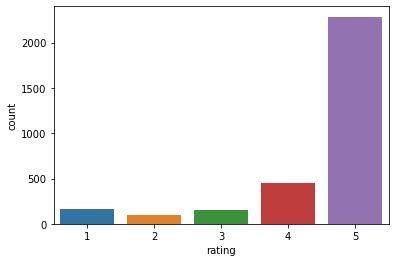

In [17]:
import seaborn as sns
sns.countplot(data = data, x = 'rating')

In [18]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that
reviews = data
# Dropping null values
reviews.dropna(inplace=True)

In [19]:
score_1 = reviews[reviews['rating'] == 1]
score_2 = reviews[reviews['rating'] == 2]
score_3 = reviews[reviews['rating'] == 3]
score_4 = reviews[reviews['rating'] == 4]
score_5 = reviews[reviews['rating'] == 5]

In [23]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

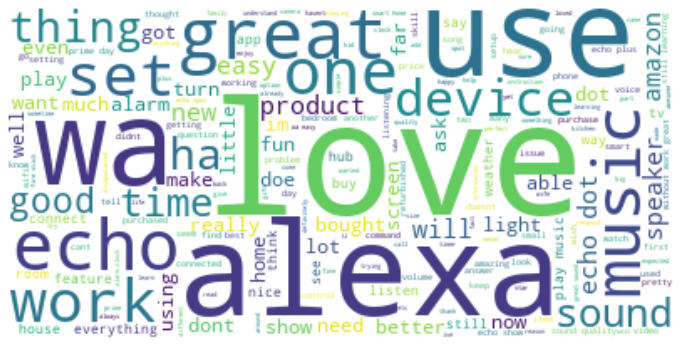

In [25]:
#Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.verified_reviews.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_reviews = reviews_sample[reviews_sample['rating'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['rating'].isin([4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.verified_reviews.str.cat()
positive_reviews_str = positive_reviews.verified_reviews.str.cat()

Text(0.5, 1.0, 'Reviews with Negative Ratings')

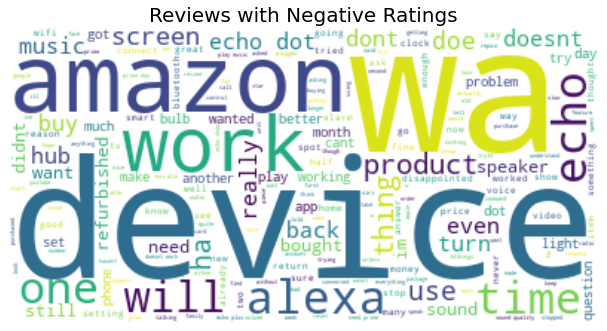

In [39]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Ratings',fontsize=20)

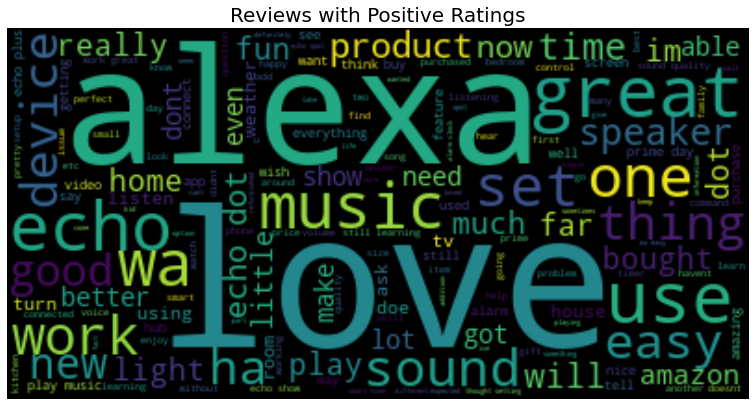

In [40]:
fig = plt.figure(figsize=(15,15))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Ratings',fontsize=20)
plt.show()

In [46]:
!pip install vaderSentiment

In [47]:
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [49]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in data['verified_reviews']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
data_sentiments=pd.DataFrame(emptyline)
data_sentiments.head(50)

,neg,neu,pos,compound
0,0.000,0.192,0.808,0.6369
1,0.000,0.000,1.000,0.5994
2,0.145,0.654,0.201,0.0516
3,0.000,0.429,0.571,0.9360
4,0.000,1.000,0.000,0.0000
5,0.000,0.574,0.426,0.8555
6,0.106,0.722,0.172,0.5945
7,0.000,0.827,0.173,0.5563
8,0.000,0.196,0.804,0.6249
9,0.000,0.570,0.430,0.8519


In [50]:
# Merging the sentiments back to reviews dataframe
data_merged = pd.concat([data.reset_index(drop=True), data_sentiments], axis=1)
data_merged.head(6)

,rating,verified_reviews,neg,neu,pos,compound
0,5,love echo,0.000,0.192,0.808,0.6369
1,5,loved,0.000,0.000,1.000,0.5994
2,4,sometimes playing game answer question correct...,0.145,0.654,0.201,0.0516
3,5,lot fun thing 4 yr old learns dinosaur control...,0.000,0.429,0.571,0.9360
4,5,music,0.000,1.000,0.000,0.0000
5,5,received echo gift needed another bluetooth so...,0.000,0.574,0.426,0.8555


In [51]:
# Convert ratings into positive and negetive sentiments using some threshold
data_merged['Sentiment'] = np.where(data_merged['compound'] >= 0 , 'Positive','Negative')
data_merged.head(8)

,rating,verified_reviews,neg,neu,pos,compound,Sentiment
0,5,love echo,0.000,0.192,0.808,0.6369,Positive
1,5,loved,0.000,0.000,1.000,0.5994,Positive
2,4,sometimes playing game answer question correct...,0.145,0.654,0.201,0.0516,Positive
3,5,lot fun thing 4 yr old learns dinosaur control...,0.000,0.429,0.571,0.9360,Positive
4,5,music,0.000,1.000,0.000,0.0000,Positive
5,5,received echo gift needed another bluetooth so...,0.000,0.574,0.426,0.8555,Positive
6,3,without cellphone cannot use many feature ipad...,0.106,0.722,0.172,0.5945,Positive
7,5,think 5th one ive purchased im working getting...,0.000,0.827,0.173,0.5563,Positive


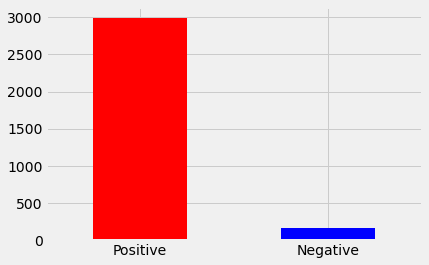

In [52]:
Result=data_merged['Sentiment'].value_counts()
Result.plot(kind='bar', rot=0, color=['red','blue']);

In [59]:
NR =data_merged[data_merged['Sentiment'] == "Negative"]
NR.head()

,rating,verified_reviews,neg,neu,pos,compound,Sentiment
80,5,wa little nervous received new echo im really ...,0.155,0.724,0.122,-0.0018,Negative
109,4,outlet doe work wa disappointed,0.437,0.563,0.000,-0.4767,Negative
112,4,liked sound troubling paid extra money access ...,0.169,0.672,0.159,-0.0864,Negative
123,4,initially harder set called tech wasnt knowled...,0.292,0.708,0.000,-0.5096,Negative
176,2,sad joke worthless,0.732,0.000,0.268,-0.5859,Negative
